In [1]:
# load library
import pandas as pd
import numpy as np
import itertools
import random
from collections import Counter
from scipy.stats import norm

# visualization
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("PM Dataset 2/insurance.csv")
df.head(10)
df.shape

(1338, 7)

In [3]:
# Dari dataset yang ada tampak column sex, smoker dan region memiliki data categorical
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### Data Preparation

In [4]:
# Pemeriksaan untuk data yang "null"
df.isnull().sum().sort_values(ascending=False)/len(df)*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [5]:
# Pemeriksaan data yang "duplicate"
df[df.duplicated(keep=False)].head(20)

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


Tampak data yang ada memiliki data duplicate, di index ke 195 dan 581. 

In [6]:
# Menghilangkan file duplicate dan re checking data yang ada
df.drop_duplicates(keep='first',inplace=True, ignore_index=True)
df[df.duplicated(keep=False)].head(20)

,age,sex,bmi,children,smoker,region,charges


In [7]:
# Pemeriksaan data "outlier" untuk "BMI"
q3_df = df["bmi"].quantile(0.75)
df_outlier_BMI = df[df["bmi"] > q3_df*1.5]
df_outlier_BMI

,age,sex,bmi,children,smoker,region,charges
1046,22,male,52.58,1,yes,southeast,44501.3982
1316,18,male,53.13,0,no,southeast,1163.4627


<AxesSubplot:xlabel='bmi'>

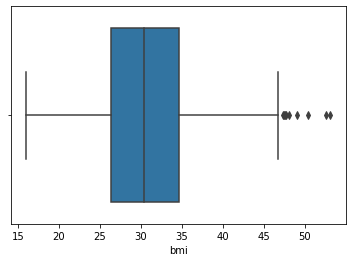

In [8]:
# Contoh boxplot untuk data BMI
sns.boxplot(data=df, x=df["bmi"])

Tampak data BMI memiliki memiliki outlier

In [9]:
# Me-replace data outlier BMI dengan data median
df.loc[df["bmi"] > (df["bmi"].quantile(0.75)*1.5), "bmi"]= df["bmi"].median()

In [9]:
# Pemeriksaan data "outlier" untuk "charges"
"""
q3_df = df["charges"].quantile(0.75)
df_outlier_charges = df[df["charges"] > q3_df*1.5]
df_outlier_charges
"""

,age,sex,bmi,children,smoker,region,charges
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1307,25,female,30.200,0,yes,southwest,33900.65300
1312,19,female,34.700,2,yes,southwest,36397.57600
1320,62,male,26.695,0,yes,northeast,28101.33305
1322,42,female,40.370,2,yes,southeast,43896.37630


In [10]:
"""
df.loc[df["charges"] > (df["charges"].quantile(0.75)*1.5), "charges"]= df["charges"].mean()
"""

In [11]:
"""
q3_df = df["charges"].quantile(0.75)
df_outlier_charges = df[df["charges"] > q3_df*1.5]
df_outlier_charges
"""

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
45,55,male,37.300,0,no,southwest,20630.28351
52,48,male,28.000,1,yes,southwest,23568.27200
58,53,female,22.880,1,yes,southeast,23244.79020
85,45,male,22.895,2,yes,northwest,21098.55405
...,...,...,...,...,...,...,...
1277,39,male,29.925,1,yes,northeast,22462.04375
1280,47,female,27.645,2,yes,northwest,24535.69855
1303,42,male,24.605,2,yes,northeast,21259.37795
1306,32,male,28.120,4,yes,northwest,21472.47880


<Axes: xlabel='bmi'>

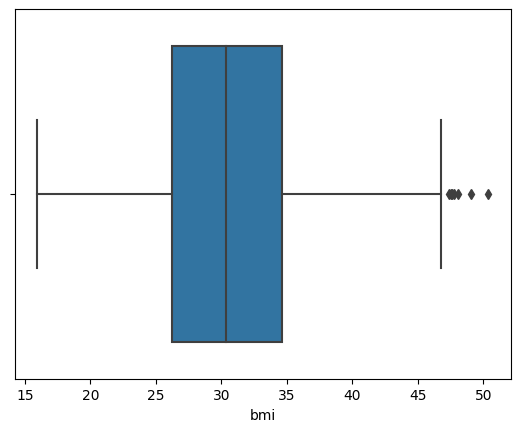

In [9]:
"""
df.loc[df["bmi"] > (df["bmi"].quantile(0.75)*1.5), "bmi"]= df["bmi"].mean()
sns.boxplot(data=df, x=df["bmi"])
"""

<AxesSubplot:xlabel='BMI', ylabel='Density'>

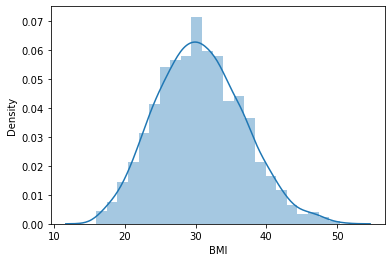

In [10]:
# Tampak distribusi BMI mengikuti "normal distribution"
sns.distplot(df['bmi'], axlabel='BMI', kde=True)

### Part 1. Analisa Descriptive Statistic

**1.1. Rata - rata umur pada data**

In [12]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.629862,1.095737,13279.121487
std,14.044333,6.039648,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.600000,2.000000,16657.717450
max,64.000000,50.380000,5.000000,63770.428010


In [13]:
df['age'].mean()

39.222139117427076

**1.2. Rata-rata nilai BMI dari yang merokok**

In [21]:
df[df['smoker']=="yes"]['bmi'].mean()

30.708448905109503

In [17]:
smoker_female = df[(df['smoker']=="yes")&(df['sex']=="female")]['bmi'].mean()
print(f"smoker_female : {smoker_female}")
smoker_male = df[(df['smoker']=="yes")&(df['sex']=="male")]['bmi'].mean()
print(f"smoker_male : {smoker_male}")

smoker_female : 29.608260869565225
smoker_male : 31.3646855345912


**1.3. Apakah variansi dari tagihan kesehatan perokok dan non perokok sama**

   ![variance formula.jpg](<attachment:variance formula.jpg>)
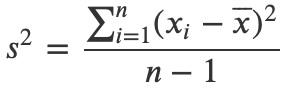

In [18]:
df[df['smoker']=="yes"]['charges'].var()==df[df['smoker']=="no"]['charges'].var()

False

**1.4. Apakah rata-rata umur perempuan dan laki-laki yang merokok sama?**

In [20]:
df[(df['smoker']=="yes")&(df["sex"]=="male")]['age'].mean()==df[(df['smoker']=="yes")&(df["sex"]=="female")]['age'].mean()

False

**1.5. Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok atau non perokok?**

In [25]:
df[df['smoker']=="yes"]['charges'].mean()

32050.23183153285

In [26]:
df[df['smoker']=="no"]['charges'].mean()

8440.660306508935

In [27]:
df[df['smoker']=="yes"]['charges'].mean() > df[df['smoker']=="no"]['charges'].mean()

True

**1.6. Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok yang BMI nya di atas 25, atau non perokok yang BMI nya di atas 25 (overweight)**

In [29]:
df[(df['bmi']>25)&(df['smoker']=='yes')]['charges'].mean()

35116.90965694065

In [30]:
df[(df['smoker']=="no")&(df['bmi']>25)]['charges'].mean()

8637.614898471862

In [25]:
df[(df['bmi']>25)&(df['smoker']=='yes')]['charges'].mean() > df[(df['smoker']=="no")&(df['bmi']>25)]['charges'].mean()

True

**1.7. BMI mana yang lebih tinggi, seorang perokok atau non perokok**

In [31]:
df[df['smoker']=="yes"]['bmi'].mean()

30.627500000000012

In [32]:
df[df['smoker']=="no"]['bmi'].mean()

30.63047036688614

In [33]:
df[df['smoker']=="yes"]['bmi'].mean() > df[df['smoker']=="no"]['bmi'].mean()

False

### Part 2 - Analisa Variable Diskrit

**2.1. Gender mana yang memiliki tagihan paling tinggi**

In [44]:
female = df[df['sex']=="female"]['charges'].mean()

12569.57884383534

In [45]:
male = df[df['sex']=="male"]['charges'].mean()

13974.998863762954

In [53]:
import plotly.express as px

df2 = pd.DataFrame(dict(
    group = ["male", "female"],
    value = [male, female]))

fig = px.bar(df2, x = 'group', y = 'value', title='persentase tagihan kesehatan female vs male')

fig.show()

**2.2. Distribusi peluang tagihan di tiap tiap daerah**

In [64]:
# charges : normal atau exponensial?
list_region = df['region'].unique()
region1 = []
porsi = []
for i in list_region:
    print(f"{i} : {round(df[df['region']==i]['charges'].count()/df['charges'].count(),4)}")
    region1.append(i)
    porsi.append(round(df[df['region']==i]['charges'].count()/df['charges'].count(),4))

southwest : 0.2431
southeast : 0.2723
northwest : 0.2423
northeast : 0.2423


In [66]:
import plotly.express as px
import numpy
 
fig = px.pie(values=porsi, names=region1, title='Distribusi peluang tagihan tiap daerah')
fig.show()

**2.3. Mana yang lebih tinggi, proporsi perokok atau non perokok**

In [70]:
df_by_smoker = df[["smoker", "age"]].groupby("smoker").count()
df_by_smoker.rename(columns = {'age':'jumlah'}, inplace = True)
df_by_smoker["porsi"] = df[["smoker", "age"]].groupby("smoker").count() / df["smoker"].count()
df_by_smoker


,jumlah,porsi
smoker,,
no,1063,0.795064
yes,274,0.204936


**2.4. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok**

$$
\begin{align*}
P(Perempuan \ | \ Perokok) &= \cfrac{n(Perempuan \cap Perokok)}{n(Perokok)} \\ 
 &= \cfrac{P(Perempuan \cap Perokok)}{P(Perokok)}
\end{align*}
$$

In [51]:
n_perempuan = df[df['sex']=="female"]['sex'].count()
n_pria = df[df['sex']=="male"]['sex'].count()
n_smoker = df[df['smoker']=="yes"]['smoker'].count()
n_smoker_perempuan = df[(df['smoker']=="yes")&(df['sex']=="female")]['smoker'].count()
n_smoker_pria = df[(df['smoker']=="yes")&(df['sex']=="male")]['smoker'].count()
print(f"Peluang Perempuan given Merokok adalah : {round(n_smoker_perempuan / n_smoker, 4)}")

Peluang Perempuan given Merokok adalah : 0.4197


**2.6. Berapa peluang seseorang tersebut adalah laki-laki, diketahui dia adalah perokok**

In [52]:
print(f"Peluang Pria given Merokok adalah : {round(n_smoker_pria / n_smoker, 4)}")

Peluang Pria given Merokok adalah : 0.5803


### Part 3 - Analisa variable continue

1. Mana yang lebih mungkin terjadi </br>
   - Seseorang dengan BMI diatas  25 mendapatkan tagihan kesehatan di atas 16.7k, atau
   - Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan di atas 16.7k
2. Mana yang lebih mungkin terjadi </br>
   - Seseorang perokok dengan BMI diatas  25 mendapatkan tagihan kesehatan di atas 16.7k, atau
   - Seseorang non-perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k

In [34]:
# 3.1 Seseorang perokok dengan BMI diatas  25 mendapatkan tagihan kesehatan di atas 16.7k


def load_data_insurance() :
    insurance3 = df[["bmi","smoker","charges"]]
    insurance3 = insurance3.rename(columns={"bmi":"bmi","smoker":"perokok","charges":"tagihan"})
    return insurance3
insurance3 = load_data_insurance()
insurance3

,bmi,perokok,tagihan
0,27.900,yes,16884.92400
1,33.770,no,1725.55230
2,33.000,no,4449.46200
3,22.705,no,21984.47061
4,28.880,no,3866.85520
...,...,...,...
1332,30.970,no,10600.54830
1333,31.920,no,2205.98080
1334,36.850,no,1629.83350
1335,25.800,no,2007.94500


In [35]:
condition = insurance3["tagihan"]>16700
cond_3a = insurance3[condition]
cond_3a

,bmi,perokok,tagihan
0,27.900,yes,16884.92400
3,22.705,no,21984.47061
9,25.840,no,28923.13692
11,26.290,yes,27808.72510
14,42.130,yes,39611.75770
...,...,...,...
1317,39.710,no,19496.71917
1320,26.695,yes,28101.33305
1322,40.370,yes,43896.37630
1327,24.225,no,22395.74424


In [36]:
#mendapatkan nilai rata-rata
ratarata = np.mean(cond_3a['bmi'])

#mendapatkan nilai standar deviasi
standardeviasi = np.std(cond_3a['bmi'])

# Nilai pembatas BMI yang diinginkan
x = 25

#menghitung standarisasi data
Z = (x-ratarata)/standardeviasi

#mendapatkan nilai CDF diatas nilai X
p = 1-norm.cdf(Z)
print(p)

0.8640252046676873


In [37]:
# Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan di atas 16.7k
p = norm.cdf(Z)
print(p)

0.13597479533231266


In [40]:
# 3.2. Seseorang perokok dengan BMI diatas  25 mendapatkan tagihan kesehatan di atas 16.7k
condition = (insurance3["tagihan"]>16700) & (insurance3["perokok"] == "yes")
cond_3b = insurance3[condition]
cond_3b

,bmi,perokok,tagihan
0,27.900,yes,16884.92400
11,26.290,yes,27808.72510
14,42.130,yes,39611.75770
19,35.300,yes,36837.46700
23,31.920,yes,37701.87680
...,...,...,...
1312,34.700,yes,36397.57600
1313,23.655,yes,18765.87545
1320,26.695,yes,28101.33305
1322,40.370,yes,43896.37630


In [41]:
# Mendapatkan nilai rata-rata
ratarata = np.mean(cond_3b['bmi'])

#mendapatkan nilai standar deviasi
standardeviasi = np.std(cond_3b['bmi'])

# Nilai pembatas BMI yang diinginkan
x = 25

#menghitung standarisasi data
Z = (x-ratarata)/standardeviasi

#mendapatkan nilai CDF diatas nilai X
p = 1-norm.cdf(Z)
print(p)

0.8586684456987577


In [42]:
# Seseorang non-perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k
p = norm.cdf(Z)
print(p)

0.1413315543012424


### Part 4 - Analisa Korelasi Variables

Korelasi tagihan kesehatan dengan 2 variable lain nya mis bmi atau tanggungan anak

In [49]:
import pandas as pd
import numpy as np
from numpy import cov
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

import ipywidgets as widgets
from ipywidgets import interact

**Korelasi antara tagihan (charges) dan variable BMI (bmi)**

In [33]:
# Seleksi kolom dari dataset yang di butuhkan saja (bmi, children dan charges)
df4 = df[["bmi","children","charges"]]
df4

,bmi,children,charges
0,27.900,0,16884.92400
1,33.770,1,1725.55230
2,33.000,3,4449.46200
3,22.705,0,21984.47061
4,28.880,0,3866.85520
...,...,...,...
1332,30.970,3,10600.54830
1333,31.920,0,2205.98080
1334,36.850,0,1629.83350
1335,25.800,0,2007.94500


Kita coba buatkan strip plot dari data BMI dan charges. Tampak dari plot di bawah bahwa nilai BMI tervisualisasi seakan - akan berupa garis lurus

Hal ini disebabkan satuan unit antara  bmi dan charges yang berbeda.

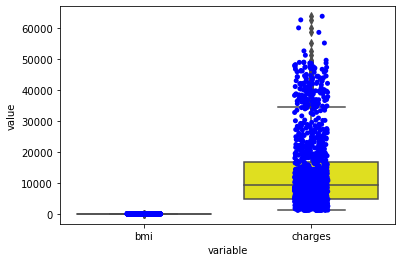

In [34]:
def stripplot_boxplot(df):
    g = sns.stripplot(data = df.melt(), 
                      x = 'variable', 
                      y = 'value', 
                      color = 'blue')
    sns.boxplot(data = df.melt(),
                x = 'variable', 
                y = 'value', 
                color = 'yellow')
stripplot_boxplot(df4[['bmi','charges']])

Kita akan membuat visualisasi scatter plot untuk melihat bagaimana BMI dan charges berhubungan satu sama lain.

Text(0, 0.5, 'B M I')

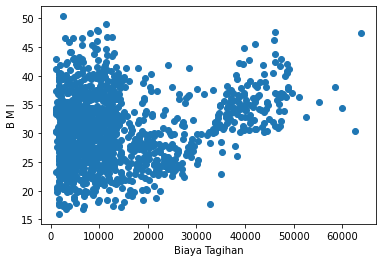

In [35]:
import matplotlib.pyplot as plt
plt.scatter(df4['charges'], df4['bmi'])
plt.xlabel('Biaya Tagihan')
plt.ylabel('B M I')

Kita hitung nilai varians dari kedua variable tersebut. Tampak "charges", memiliki varians yang lebih besar daripada "bmi".
Hal ini tampak terlihat dari "scatter plot" di atas, dimana "biaya tagihan" lebih memiliki plot yang lebih tersebar

In [36]:
np.var(df4[['bmi','charges']], ddof=1)

bmi        3.647735e+01
charges    1.466608e+08
dtype: float64

Memeriksa apakah terdapat korelasi antara BMI dan biaya tagihan berdasarkan co-variance. Kita menggunakan built-in function dari numpy

In [37]:
np.cov(df4['bmi'], df4['charges'])

array([[3.64773536e+01, 1.43454121e+04],
       [1.43454121e+04, 1.46660811e+08]])

Telah didapatkan kovarians 1.4345 x 10 e+04, sehingga bisa disimpulkan bahwa variable BMI dan "charges" (biaya tagihan) saling berhubungan. Namun dengan kovarians tidak mudah ditafsirkan secara kuantitatif, sehingga kita perlu menghitung korelasi.

Korelasi digunakan untuk mengukur kekuatan dan arah hubungan linier antara dua variabel random. Dengan library pandas kita dapat menggunakan fungsi corr() untuk menghitung korelasi antara variable BMI dan "charges" (biaya tagihan).

In [38]:
corr = df4[['bmi', 'charges']].corr()
corr

,bmi,charges
bmi,1.00000,0.19613
charges,0.19613,1.00000


- Nilai diagonal 1 menunjukkan korelasi setiap kolom dengan dirinya sendiri. 

- Nilai 0.19613 merupakan koefisien korelasi Pearson antara bmi dan charges (biaya tagihan). Nilai korelasi sebesar 0.19613, merupakan korelasi positif yang menunjukkan bahwa kenaikan satu variabel akan di ikuti penambahan nilai pada variabel lainnya.

- Nilai 0.19613 diinterpretasikan sebagai hubungan variabel bmi dan charges yang walau ber korelasi positif namun tidak berkorelasi kuat

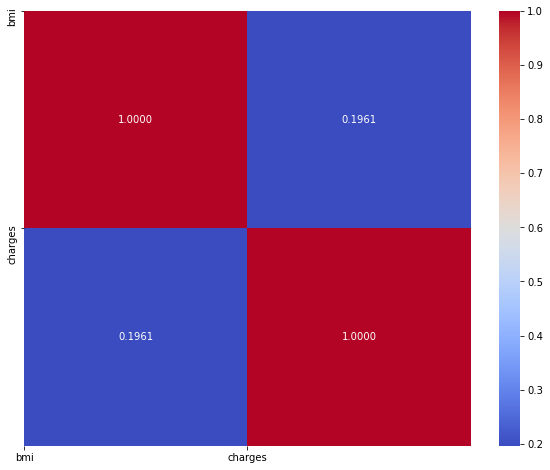

In [43]:
corr = df4[['bmi', 'charges']].corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".4f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

**Korelasi antara tagihan (charges) dan tanggungan anak**

Untuk metoda yang di gunakan tidak berbeda jauh dengan metoda di atas

Kita coba buatkan strip plot dari data children dan charges. Tampak dari plot di bawah bahwa nilai  variable children tervisualisasi seakan - akan berupa garis lurus

Hal ini disebabkan satuan unit antara children dan charges yang jauh berbeda.

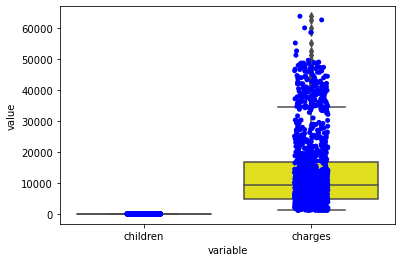

In [44]:
def stripplot_boxplot(df):
    g = sns.stripplot(data = df.melt(), 
                      x = 'variable', 
                      y = 'value', 
                      color = 'blue')
    sns.boxplot(data = df.melt(),
                x = 'variable', 
                y = 'value', 
                color = 'yellow')
stripplot_boxplot(df4[['children','charges']])

Kita akan membuat visualisasi scatter plot untuk melihat bagaimana children dan charges berhubungan satu sama lain.

Text(0, 0.5, 'Children')

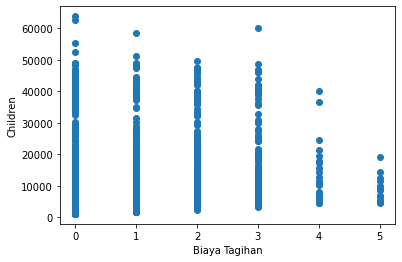

In [45]:
import matplotlib.pyplot as plt
plt.scatter(df4['children'], df4['charges'])
plt.xlabel('Biaya Tagihan')
plt.ylabel('Children')

Kita hitung nilai varians dari kedua variable tersebut. kita menggunakan built-in function dari numpy

Tampak "charges", memiliki varians yang lebih besar daripada "children".

In [46]:
np.var(df4[['children','charges']], ddof=1)

children    1.453402e+00
charges     1.466608e+08
dtype: float64

Memeriksa apakah terdapat korelasi antara children dan biaya tagihan berdasarkan co-variance. Kita menggunakan built-in function dari numpy

In [47]:
np.cov(df4['children'], df4['charges'])

array([[1.45340247e+00, 9.83878025e+02],
       [9.83878025e+02, 1.46660811e+08]])

Telah didapatkan kovarians 9.8387 x 10 e+02, sehingga bisa disimpulkan bahwa variable children dan "charges" (biaya tagihan) saling berhubungan. Namun dengan kovarians tidak mudah ditafsirkan secara kuantitatif, sehingga kita perlu menghitung korelasi.

Korelasi digunakan untuk mengukur kekuatan dan arah hubungan linier antara dua variabel random. Dengan library pandas kita dapat menggunakan fungsi corr() untuk menghitung korelasi antara variable children dan "charges" (biaya tagihan).

In [48]:
corr1 = df4[['children', 'charges']].corr()
corr1

,children,charges
children,1.000000,0.067389
charges,0.067389,1.000000


- Nilai diagonal 1 menunjukkan korelasi setiap kolom dengan dirinya sendiri. 

- Nilai 0.0673 merupakan koefisien korelasi Pearson antara charges dan charges (biaya tagihan). Nilai korelasi sebesar 0.0673, merupakan korelasi positif yang menunjukkan bahwa kenaikan satu variabel akan di ikuti penambahan nilai pada variabel lainnya.

- Nilai 0.0673 diinterpretasikan sebagai hubungan variabel children dan charges yang walau ber korelasi positif namun sangat lemah (mendekati nol)

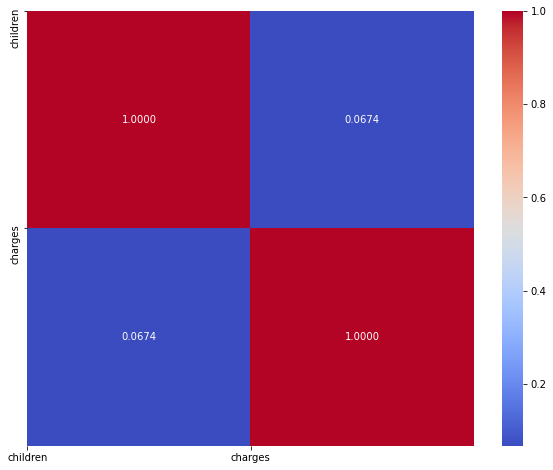

In [50]:
corr1 = df4[['children', 'charges']].corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr1, cmap='coolwarm', annot=True, fmt=".4f")
plt.xticks(range(len(corr1.columns)), corr1.columns);
plt.yticks(range(len(corr1.columns)), corr1.columns)
plt.show()

### Part 5 - Pengujian Hipotesis

**1. Tagihan Kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok**

**1.1. Hipotesis dan Significance Level**

Hipotesis yang akan kita uji adalah:
$$H_0: \mu_{Smoker} \leq \mu_{NonSmoker}$$
$$H_1: \mu_{Smoker} > \mu_{NonSmoker}$$

Dengan nilai $\alpha$ = 0.05

**1.2. Statistik uji yang akan digunakan**

kita akan menggunakan test on the equality of two means : with population variance are not equal

$$ T = \frac{(\bar{x} - \bar{y}) -(\mu_x - \mu_y)}{\sqrt{{sx^2/n} + {sy^2/m}}} \sim t_{n-1}.$$

**1.3. Aturan Keputusan**

- $\alpha$ = 0.05
- Uji Satu Pihak (dalam $H_1$ mengandung tanda >)                 
- Daerah Penolakan ada di sebelah kanan dari nilai kritis
- Ada 2 cara pengambilan keputusan
  - jika kita mendapatkan nilai pvalue kurang dari alpha, maka kita tolak $H_0$
  - jika kita mendapatkan statistik uji lebih dari nilai kritis, maka kita tolak $H_0$

**1.4. Perhitungan Statistik Uji**

In [13]:
# Pemeriksaan apakah variance dari kedua kelompok sama
# dari hasil di bawah terlihat kedua kelompok memiliki variance yang berbeda

df[df['smoker']=="yes"]['charges'].var(), df[df['smoker']=="no"]['charges'].var()

(133207311.20634921, 35915734.96876324)

In [14]:
# Data dari 2 kelompok
smoker = df[df['smoker']=="yes"]['charges']
non_smoker = df[df['smoker']=="no"]['charges']

In [15]:
# Menggunakan library `scipy.stats` (uji statistik t  rata rata 2 sampel)
from scipy.stats import ttest_ind

t_hitung, p_hitung = ttest_ind(smoker, non_smoker, equal_var=False, alternative='greater')
print('Statistics = %.4f, p = %.4f' % (t_hitung, p_hitung))

Statistics = 32.7423, p = 0.0000


**1.5. Pengambilan keputusan berdasarkan nilai p**

In [17]:
alpha = 0.05
# Pengambilan Keputusan
if p_hitung > alpha:
    print('Tagihan Kesehatan perokok lebih keci atau sama dengan daripada tagihan kesehatan non perokok (Gagal menolak H0)') 
else:
    print('Tagihan Kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok (Tolak H0)')

Tagihan Kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok (Tolak H0)


**2. Proporsi perokok laki laki lebih besar daripada perempuan**

**2.1. Hipotesis dan Significance Level**

Hipotesis yang akan kita uji adalah:

$$ H_0 : pSmokerMale \leq pFemale$$
$$ H_1 : pSmokerMale > pFemale$$

Dengan nilai $\alpha$ = 0.05

**2.2. Statistik uji yang akan digunakan**

kita akan menggunakan uji hipotesis proporsi dua populasi, dengan menggunakan distribusi z :

$$ z = \frac{\hat{p}_1-\hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_1}+\frac{1}{n_2})}} $$

**2.3. Aturan Keputusan**

- $\alpha$ = 0.05
- Uji Satu Pihak (dalam $H_1$ mengandung tanda >)                 
- Daerah Penolakan ada di sebelah kanan dari nilai kritis
- Ada 2 cara pengambilan keputusan
  - jika kita mendapatkan nilai pvalue kurang dari alpha, maka kita tolak $H_0$
  - jika kita mendapatkan statistik uji lebih dari nilai kritis, maka kita tolak $H_0$

**2.4. Perhitungan Statistik Uji**


In [18]:
# proporsi perokok laki laki (jgn lupa di bagi populasi sample nya)
n_smoker = df[df['smoker']=="yes"]['sex'].count()
n_smoker_male = df[(df['smoker']=="yes")&(df['sex']=="male")]['sex'].count()

In [19]:
# Proporsi female terhadap populasi sample
n_female = df[(df['sex']=="female")]['sex'].count()
n_sample = df[(df['sex']=="female")]['sex'].count() + df[(df['sex']=="male")]['sex'].count()

In [20]:
import numpy as np
number_of_count = np.array([n_smoker_male, n_female])
total_sample_sizes = np.array([n_smoker,n_sample])

In [21]:
# Hitung uji statistik dan p_value
from statsmodels.stats.proportion import proportions_ztest
(test_stat, p_value) = proportions_ztest(number_of_count, total_sample_sizes,alternative='larger')
print("Nilai Z-hitung adalah: ",test_stat)
print("Nilai p-hitung adalah: ", p_value)

Nilai Z-hitung adalah:  2.568660166396143
Nilai p-hitung adalah:  0.0051046260527836205


In [23]:
# Nilai Critical Value berdasarkan critical Z-value dari Z-table dengan nilai alpha 0.05
import scipy.stats as stats
z_crit=stats.norm.ppf(1-0.05)
print("Nilai z-critical adalah : ",z_crit)

Nilai z-critical adalah :  1.6448536269514722


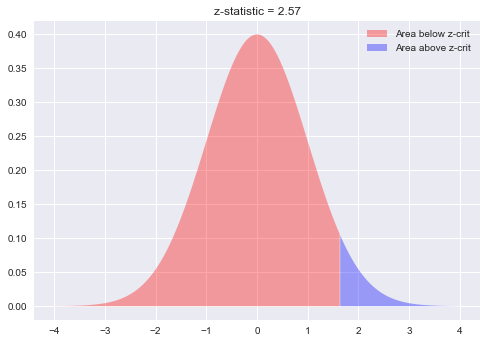

In [24]:
plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,1.64,0.01),
                 y1= stats.norm.pdf(np.arange(-4,1.64,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-crit'
                 )

plt.fill_between(x=np.arange(1.64,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1.64,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-crit')
plt.legend()
plt.title ('z-statistic = 2.57');

**2.5. Pengambilan keputusan berdasarkan nilai p**

In [26]:
# Menentukan keputusan
if p_value<0.05:
  print("Proporsi perokok laki laki > perempuan (Tolak Hipotesis Null)")
else:
  print("Proporsi perokok laki laki <= perempuan (Gagal Menolak Hipotesis Null)")

Proporsi perokok laki laki > perempuan (Tolak Hipotesis Null)


**3. Variansi tagihan perokok dan non perokok sama**

**3.1. Hipotesis dan Significance Level**

Hipotesis yang akan kita uji adalah:

$$ H_0 : \sigma_x^2 = \sigma_y^2$$
$$ H_a : \sigma_x^2  \neq \sigma_y^2$$

Dengan nilai $\alpha$ = 0.05

**3.2. Statistik uji yang akan digunakan**

Kita dapat menggunakan f distribution untuk menjawab pertanyaan di atas :

$$ F = \frac{s_x^2}{s_y^2} $$

dimana : $s_x^2$ merupakan sampel varian terbesar dan $s_y^2$ merupakan sampel varian terkecil


**3.3. Aturan Keputusan**

- $\alpha$ = 0.05
- Ada 2 cara pengambilan keputusan
  - jika kita mendapatkan nilai pvalue kurang dari alpha, maka kita tolak $H_0$
  - jika kita mendapatkan statistik uji lebih dari nilai kritis, maka kita tolak $H_0$

**3.4. Perhitungan Statistik Uji**


In [27]:
import scipy.stats as stats
import math

# group 1 = perokok
# group 2 = non-perokok
rataan1 = df[(df['smoker']=="yes")]['charges'].mean()
rataan2 = df[(df['smoker']=="no")]['charges'].mean()

# Menentukan sample variance
s_x = df[(df['smoker']=="yes")]['charges'].var()
s_y = df[(df['smoker']=="no")]['charges'].var()

# Ukuran sampel dua group
sample1 = df[(df['smoker']=="yes")]['charges'].count()
sample2 = df[(df['smoker']=="no")]['charges'].count()

In [29]:
# Hitung uji statistik
f_test=s_x/s_y
print("Hasil uji statistik adalah : ", f_test)

Hasil uji statistik adalah :  3.708884457528232


In [30]:
# Nilai Critical Value berdasarkan critical f-value dari f-table dengan nilai alpha 0.05

import scipy.stats as stats
f_crit=stats.f.ppf(1-0.05, sample1-1, sample2-1)
print(f_crit)

1.166249098662903


In [31]:
print("Dengan nilai uji statistik : ", f_test," dan nilai f_crit : ", stats.f.ppf(1-0.05,sample1-1, sample2-1))

Dengan nilai uji statistik :  3.708884457528232  dan nilai f_crit :  1.166249098662903


**3.5. Pengambilan keputusan berdasarkan nilai statistic**

In [32]:
# Menentukan aturan keputusan
if f_test>f_crit:
  print("Terdapat perbedaan variansi antara tagihan perokok dan non perokok (Tolak null hypothesis)")
else:
  print("Tidak terdapat perbedaan variansi antara tagihan perokok dan non perokok (Gagal Menolak null hypothesis)")

Terdapat perbedaan variansi antara tagihan perokok dan non perokok (Tolak null hypothesis)
